<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Copie_de_Bienvenue_dans_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Daily Challenge: Building Your First Neural Network on the MNIST Dataset#

1. Load and Preprocess the MNIST Dataset

Load the MNIST dataset using TensorFlow/Keras
Normalize the image pixel values to be between 0 and 1
Convert labels into one-hot encoded format
Split the dataset into training and test sets
Display sample images with their corresponding labels
2. Build a Fully Connected Neural Network

Define a sequential model using Keras
Flatten the 28x28 input images into a single vector
Add two hidden layers with ReLU activation
Add an output layer with Softmax activation for multi-class classification
Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric
3. Train the Neural Network

Fit the model to the training data for 10 epochs
Use a validation set to track performance during training
Observe the loss and accuracy trends over the epochs
4. Evaluate the Model’s Performance

Compute accuracy on the test dataset
Display a confusion matrix for misclassified digits
Identify which digits the model struggles with the most

1. **Load and Preprocess the MNIST Dataset**

In [11]:
! pip install tensorflow numpy scikit-learn matplotlib seaborn

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


In [14]:
x_train = x_train.astype(float) / 255.0
x_test = x_test.astype(float) / 255.0

In [15]:
# Confirm shape and range
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("Pixel range:", x_train.min(), "to", x_train.max())

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
Pixel range: 0.0 to 1.0


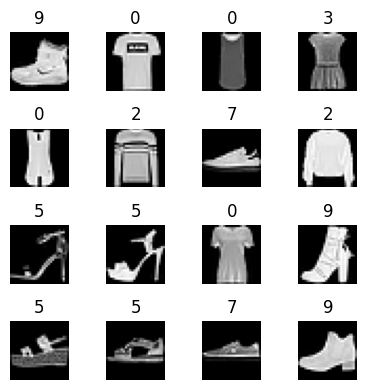

In [16]:
plt.figure(figsize=(4,4))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.tight_layout(); plt.show()

In [31]:
ffn =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10  , activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Compile the model
ffn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [24]:
#Plot Accuracy From Model History

history = ffn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7789 - loss: 0.6345 - val_accuracy: 0.8474 - val_loss: 0.4160
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8629 - loss: 0.3774 - val_accuracy: 0.8625 - val_loss: 0.3746
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8756 - loss: 0.3382 - val_accuracy: 0.8677 - val_loss: 0.3565
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8849 - loss: 0.3113 - val_accuracy: 0.8650 - val_loss: 0.3614
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8918 - loss: 0.2911 - val_accuracy: 0.8655 - val_loss: 0.3607
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8949 - loss: 0.2791 - val_accuracy: 0.8714 - val_loss: 0.3580
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8995 - loss: 0.2643 - val_accuracy: 0.8726 - val_loss: 0.3537
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9045 - loss: 0.2520 

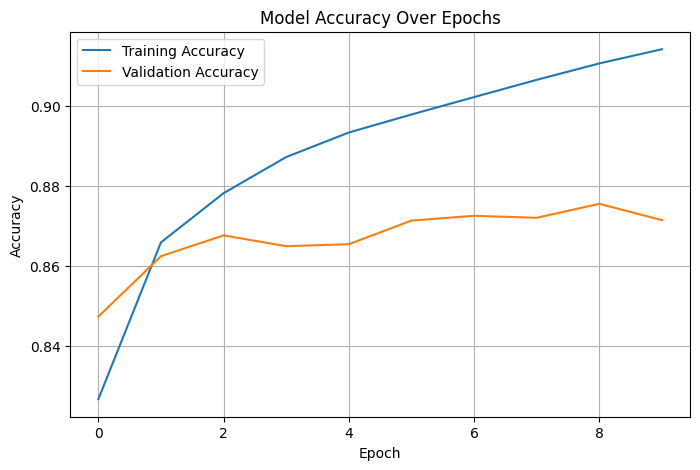

In [25]:
# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**2. Build a Fully Connected Neural Network**

In [27]:
ffn =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10  , activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# Import necessary layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [36]:
# Define the Feedforward Neural Network (FFN)
ffn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# Compile the model
ffn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

**3. Train the Neural Network**

In [38]:
# Train the model
history = ffn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7785 - loss: 0.6420 - val_accuracy: 0.8481 - val_loss: 0.4245
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8600 - loss: 0.3945 - val_accuracy: 0.8609 - val_loss: 0.3854
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8738 - loss: 0.3488 - val_accuracy: 0.8618 - val_loss: 0.3806
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8826 - loss: 0.3211 - val_accuracy: 0.8638 - val_loss: 0.3705
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8880 - loss: 0.3001 - val_accuracy: 0.8654 - val_loss: 0.3697
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8950 - loss: 0.2827 - val_accuracy: 0.8653 - val_loss: 0.3709
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8996 - loss: 0.2683 - val_accuracy: 0.8727 - val_loss: 0.3579
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9050 - loss: 0.2550

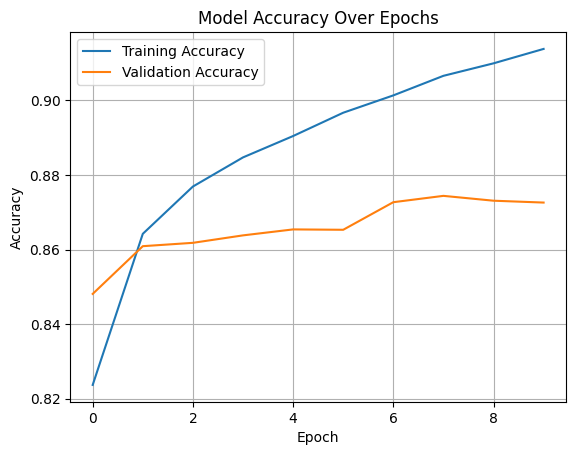

In [39]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**4. Evaluate the Model’s Performance**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


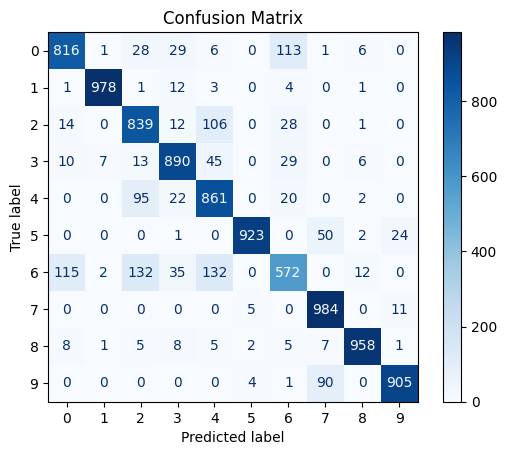

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predictions from the model
y_pred_probs = ffn.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()